Initially taking book's code as a reference

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten

In [ ]:
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
data = cifar10
(X_train, Y_train), (X_test, Y_test) = data.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
X_train= X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x) # added
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x) # added
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x) # added
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 15, 15, 64)       256 

In [ ]:
# NOTES:
# Consider batch size and normalization as in the book's code
# You can also consider padding in the Conv2D layer
# Compare Adam optimizer and rmsprop
# Consider batch normalization
# Consider dropout

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=70,batch_size=64)

Epoch 1/70
782/782 [==============================] - 18s 21ms/step - loss: 1.6747 - accuracy: 0.4253
Epoch 2/70
782/782 [==============================] - 17s 22ms/step - loss: 1.0359 - accuracy: 0.6329
Epoch 3/70
782/782 [==============================] - 17s 22ms/step - loss: 0.8346 - accuracy: 0.7112
Epoch 4/70
782/782 [==============================] - 17s 22ms/step - loss: 0.7122 - accuracy: 0.7547
Epoch 5/70
782/782 [==============================] - 17s 22ms/step - loss: 0.6346 - accuracy: 0.7843
Epoch 6/70
782/782 [==============================] - 17s 22ms/step - loss: 0.5747 - accuracy: 0.8054
Epoch 7/70
782/782 [==============================] - 17s 22ms/step - loss: 0.5263 - accuracy: 0.8206
Epoch 8/70
782/782 [==============================] - 17s 22ms/step - loss: 0.4802 - accuracy: 0.8359
Epoch 9/70
782/782 [==============================] - 17s 22ms/step - loss: 0.4520 - accuracy: 0.8478
Epoch 10/70
782/782 [==============================] - 17s 22ms/step - loss: 0.411

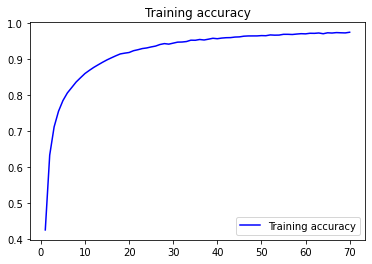

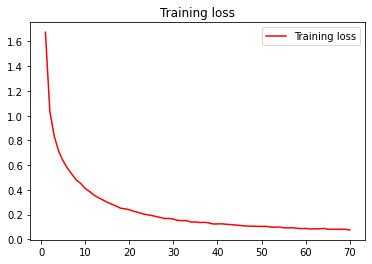

In [ ]:
# Plot Model Loss and Accuracy During Training
%matplotlib inline
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss', color='r')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# Training time = 10m (6s per epoch)
# Training acc = 89%

# Graph observation: A lot of fluctuations as compared to Waleed's

In [ ]:
# EVALUATION:
# ACCURACY = 58% [useless]
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3093 - accuracy: 0.7000


[2.309290885925293, 0.699999988079071]

In [ ]:
# When I interrputed the model at 10 epochs. It gave a test acc of 61%

####**MY EXPERIMENTS**

In [ ]:
# Experiment 1:
  # Mentioned batch_size of 64 for training
  # Training time = 6m (3s per epoch)
  # Training acc = 61%

In [ ]:
# EVALUATION:
# ACCURACY = 58% [same]
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 1B:
  # Reducing epochs to 50
  # ACCURACY = 62% [useless]
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 1C:
  # rmsprop needs 20 epochs only.
  # ACCURACY = 60% [useless]
model.evaluate(X_test,Y_test)

In [ ]:
# QUERIES:
  # Does rmsprop optimizer has any dependency with the model architecture, no. of layers, and batchnormalization layer
  # Does Adam optimizer has any dependency with dropout 

In [ ]:
# CONCLUSION:
# Batch size has reduced the training time by half

In [ ]:
# Experiment 2:
  # Continuation of Exp1 and Exp1B
  # Adding batchnormalization after each conv2d layer
    # Training time = 4m (4s per epoch)
    # Training acc = 98%

In [ ]:
# EVALUATION:
# ACCURACY = 70
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 2B:
  # Reducing epochs to 30

In [ ]:
# EVALUATION:
# ACCURACY = 71
model.evaluate(X_test,Y_test)

In [ ]:
# Conclusion: We have improved the accuracy from 60 to 70% through batch normalization

In [ ]:
# Slow internet connection

In [ ]:
# Experiment 3:
  # Continuation of Exp2
  # Normalize the data and convert data-type to float
    # Training time = 3m (4s per epoch)
    # Training acc = 97%

In [ ]:
# EVALUATION:
# ACCURACY = 70
model.evaluate(X_test,Y_test)

In [ ]:
# Conclusion: no effect on acc by experiment 3

In [ ]:
# Experiment 4:
  # Continuation of Exp3
  # Converted padding type to 'same' in the last two Conv2D layers
    # Training time = 3m (4s per epoch)
    # Training acc = 98%

In [ ]:
# EVALUATION:
# ACCURACY = 70
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 5:
  # Continuation of Exp4
  # "Changing the positions of Max Pooling layers"
    # Training time = 5m (7s per epoch)
    # Training acc = 98%

**BETTER MODEL**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x)      # added
                                        # removed Max Pooling
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.MaxPooling2D(pool_size=2)(x) # added
x = layers.Dropout(0.5)(x)              # added
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
#model.summary()

In [ ]:
# EVALUATION:
# ACCURACY = 73
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 5B:
    # Removing one more Max Pooling layer (the upper one)
    # Training time = 7m (11s per epoch)
    # Training acc = 98%

In [ ]:
# EVALUATION:
# ACCURACY = 67 [useless]
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 6:
    # Introducing dropout
  # Continuation of Exp5 orig
    # Training time = 5m (7s per epoch)
    # Training acc =

In [ ]:
# Dropout has changed the curve a lot. Great!
# Lets try more epochs = 50
    # Training time = 13m (7s per epoch)
    # Training acc = 95%

In [ ]:
# EVALUATION:
# ACCURACY = 80 [Good improvement]
model.evaluate(X_test,Y_test)

In [ ]:
# Conclusion: We have improved the accuracy from 73 to 80% through dropout

In [ ]:
# Lets try more epochs = 100
    # Training time = 7m (7s per epoch)
    # Training acc = 92%

In [ ]:
# EVALUATION:
# ACCURACY = 80
model.evaluate(X_test,Y_test)

In [ ]:
# Conclusion: 50 epochs are enough with dropout

In [ ]:
# Experiment 7:
  # Removing all batch_normalization layers
    # Training time =  (6s per epoch)
    # Training acc = 89%

# EVALUATION:
# ACCURACY = 79
model.evaluate(X_test,Y_test)

In [ ]:
# Conslusion: Don't remove batch_normalization layers

In [ ]:
# Try 100 epochs then pull it back to 50
    # Training time =  10m (6s per epoch)
    # Training acc = 92%

# EVALUATION:
# ACCURACY = 78.4 [useless]
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 8:
  # Adding one dropout layer of 0.4
    # Training time = (7s per epoch)
    # Training acc = 84%

# EVALUATION:
# ACCURACY = 76%
model.evaluate(X_test,Y_test)

In [ ]:
# Conclusion: One dropout layer is enough
# Removing the last added layer

In [ ]:
# Experiment 9:
  # Big changes: Added 03 Conv2D layers (one in each set)
    # Training time = 10m (12s per epoch)
    # Training acc = 97%

# EVALUATION:
# ACCURACY = 82.6%
model.evaluate(X_test,Y_test)

**Another Model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x)      # added
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
                                        # removed Max Pooling
x = layers.Dropout(0.3)(x)              # added

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)              # added

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      # added
x = layers.MaxPooling2D(pool_size=2)(x) # added
x = layers.Dropout(0.5)(x)              # added

x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
# Experiment 10:
  # Adding 02 more dropout layer as in the waleed's code
    # Training time =  10m (13s per epoch)
    # Training acc = 92%

# EVALUATION:
# ACCURACY = 85.2%
model.evaluate(X_test,Y_test)

In [ ]:
# NICE IMPROVEMENT! with 03 dropout layer

In [ ]:
# Experiment 11:
  # Adding batch normalization layer in between each set of Conv2D layers as in the waleed's code
    # Training time = 12m (16s per epoch)
    # Training acc = 93

# EVALUATION:
# ACCURACY = 86.4%
model.evaluate(X_test,Y_test)

**NOTE:**

In [ ]:
# 1) WARNING:
  # Consider type of padding in the first Conv2D layer

In [ ]:
# 2) CONSIDER:
  # Batch_size

In [ ]:
# Now compare the no. of CNN nodes with your MNIST or CatsDogs code
  # We can add a dense layer of our choice ----- done
  # We will change the last Conv2D layer nodes to 256 ----- done
  # Then we will add one, one Conv2D layer in each set ----- done

In [ ]:
# Last work: Play with wrong predicitons

In [ ]:
# Experiment 12:
  # Changed the last Conv2D layer nodes to 256
    # Training time = 13m (16s per epoch)
    # Training acc = 93
    # Conclusion: By seeing the graph, I think we can improve acc by giving more epochs 

# EVALUATION:
# ACCURACY = 84.0% [lower]
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 13:
  # Continuation of Exp 11
  # Adding one, one, Conv2D layer in each set
    # Training time = 19m (21s per epoch)
    # Training acc = 96
    # Conclusion: Maybe more epochs would be better

# EVALUATION:
# ACCURACY = 85.7% [lower]
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 14:
  # Continuation of Exp 13
  # Adding dense layer of 128 after flatten
    # Training time = 19m (21s per epoch)
    # Training acc = 95

# EVALUATION:
# ACCURACY = 88.4%
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4241 - accuracy: 0.8839


[0.424057275056839, 0.883899986743927]

#### **THE BEST MODEL**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.BatchNormalization()(x)      
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      
  # removed MaxPooling                                        
x = layers.Dropout(0.2)(x)             

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)      
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.3)(x)         

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)   
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)     

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)              # added
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

In [ ]:
# Experiment 15:
  # Continuation of Exp 14
  # Set two Conv2D layers in each set
    # Training time = 12m (15s per epoch)
    # Training acc = 92

# EVALUATION:
# ACCURACY = 86.5%
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 16:
  # Continuation of Exp 15
  # Add a set of 256 Conv2D
    # Training time =  (17s per epoch)
    # Training acc = 97
    # OBSERVATION: Final dimensions after CNN operation is 3 by 3.

# EVALUATION:
# ACCURACY = 89.2% [best]
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4285 - accuracy: 0.8918


[0.42845094203948975, 0.8917999863624573]

Congratulations! You beat the record

In [ ]:
# Lets try 70 epochs with batch_size = 128
    # Training time = 18m (15s per epoch)
    # Training acc = 97

# EVALUATION:
# ACCURACY = 88%
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 17:
  # Continuation of Exp 16
  # Adding one more dense layer of 256 nodes above 128's.
  # Pull Epochs back to 50, batch_size = 128
    # Training time = 13m (15s per epoch)
    # Training acc = 97

# EVALUATION:
# ACCURACY = 88.8%
model.evaluate(X_test,Y_test)

In [ ]:
# Lets try batch_size = 64
    # Training time = (17s per epoch)
    # Training acc = 97

# EVALUATION:
# ACCURACY = 88.6%
model.evaluate(X_test,Y_test)

In [ ]:
# Experiment 18:
  # Delete 256 dense layer. Batch_size = 64, set same padding for the first CNN layer.
  # Now you have only one hidden dense layer of 128. 

# EVALUATION:
# ACCURACY = 89.07%
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4348 - accuracy: 0.8907


[0.43483662605285645, 0.8906999826431274]

In [ ]:
# Conclusion:
  # No use of same padding in the first layer

In [ ]:
# THE BEST MODEL:
  # Remove the same padding in the first layer
  # Epoch = 70
    # Training time = 20m (17s per epoch)
    # Training acc = 97

# EVALUATION:
# ACCURACY = 89.3%
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4492 - accuracy: 0.8926


[0.449187695980072, 0.8925999999046326]

In [ ]:
# NOTE: You can also try 50 epochs
# 50 epochs will probably give an accuracy 89.2%

**THE END**

In [ ]:
# Refer experiment-notebook in which we PLAYED WITH WRONG PREDICTIONS